In [3]:
import Bio.PDB as pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ПОДГОТОВКА

Перейдите на <a href="https://projectswhynot.site/pdb-filtering/">эту страничку</a>, получим ID белков для этого семинара.

In [7]:
path = "/Users/andreyignatov/Downloads/filtering_results-9.csv"

data = pd.read_csv(path, ";")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
chains = []

In [12]:
parser = pdb.PDBParser()
for i in range(data.shape[0]):
    pdb_id, model_id, _ = data.loc[i]
    # качаем файл
    path = pdb.PDBList().retrieve_pdb_file(pdb_id, 
                                           file_format="pdb")
    # открываем структуру
    struct = parser.get_structure(pdb_id, path)
    
    chain = struct[model_id].child_list[0].child_list
    chains += [chain]

Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/jn/pdb2jnt.ent' 
Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/b6/pdb4b6v.ent' 
Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/k8/pdb2k8y.ent' 
Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/dd/pdb1ddb.ent' 
Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/h2/pdb1h2o.ent' 
Structure exists: '/Users/andreyignatov/work_google_drive/work/teaching/HSE/2022-2023/Методы_моделирования_пространственной_структуры_протеинов/1_2/do/pdb2do9.ent' 
Structure 

# ЧАСТЬ 1

### Задание 1. Соберите и выведите на гистограмме значения угла $\omega = \angle(C_\alpha^{i-1}, C^{i-1}, N^{i}, C_\alpha^{i})$. Почему он не рассматривается при предсказании геометрии?

In [14]:
omegas = []

for chain in chains:
    for i in range(1, len(chain)):
        omega = pdb.calc_dihedral(chain[i - 1]["CA"].get_vector(), 
                                  chain[i - 1]["C"].get_vector(), 
                                  chain[i]["N"].get_vector(), 
                                  chain[i]["CA"].get_vector())
        omegas += [omega]


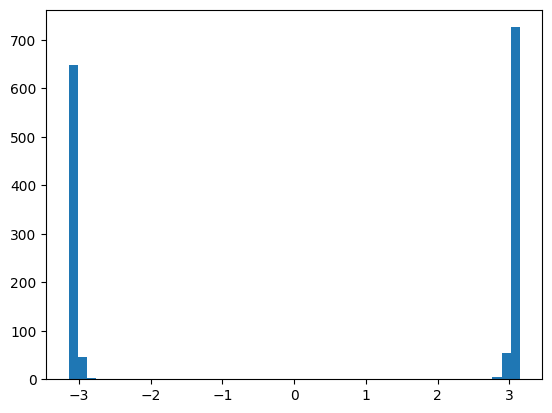

In [15]:
plt.hist(omegas, bins=50)
plt.show()

### Задание 2. Выведите отдельно гистограммы значений углов $\phi, \psi$.

In [17]:
phis = []
psis = []

for chain in chains:
    for i in range(1, len(chain) - 1):
        phi = pdb.calc_dihedral(chain[i - 1]["C"].get_vector(), 
                                chain[i]["N"].get_vector(), 
                                chain[i]["CA"].get_vector(), 
                                chain[i]["C"].get_vector())
        psi = pdb.calc_dihedral(chain[i]["N"].get_vector(), 
                                chain[i]["CA"].get_vector(), 
                                chain[i]["C"].get_vector(), 
                                chain[i + 1]["N"].get_vector(),)
        
        phis += [phi]
        psis += [psi]



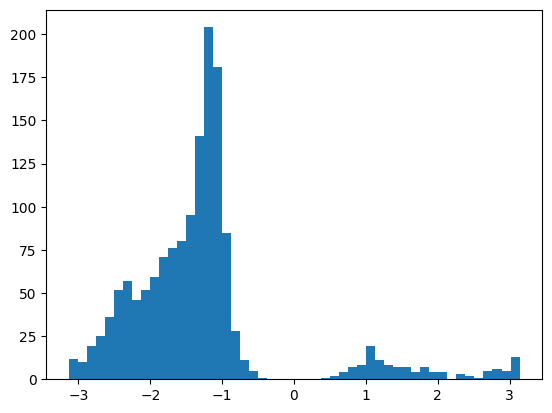

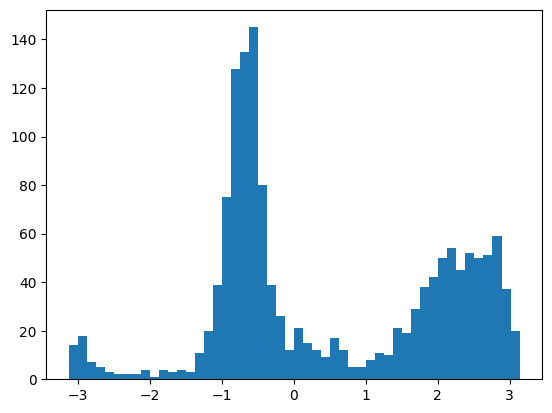

In [18]:
plt.hist(phis, bins=50)
plt.show()

plt.hist(psis, bins=50)
plt.show()

### Задание 3. Постройте карту Рамачандрана для собранных значений. Соотносится ли она с тем, что было рассказано на лекции?

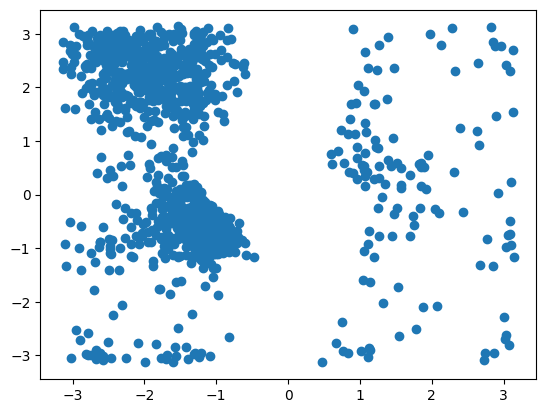

In [19]:

plt.scatter(phis, psis)

plt.show()


# ЧАСТЬ 2

### Допустим, у нас есть основной каркас (все атомы $N,C_\alpha, C$). Давайте восстановим координаты атома $C_\beta$. Для этого нам нужно значение двугранного угла $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$, значение планарного угла $\angle(N^{i}, C_\alpha^{i}, C_\beta^{i})$ и длина связи $C_\alpha-C_\beta$.

### Задание 4.1. Соберите и выведите на гистограмме значения двугранного угла $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$. Можно ли визуально заметить зависимость с углами $\phi, \psi?$

**Комментарий:** обратите внимание, у GLY нет атома $C_\beta$!

In [21]:
angles = []

for chain in chains:
    for i in range(1, len(chain)):
        if chain[i].resname == "GLY":
            continue
        ang = pdb.calc_dihedral(chain[i - 1]["C"].get_vector(), 
                                  chain[i]["N"].get_vector(), 
                                  chain[i]["CA"].get_vector(), 
                                  chain[i]["CB"].get_vector())
        angles += [ang]



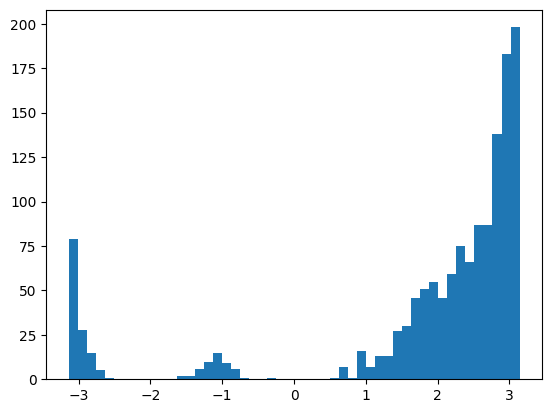

In [22]:
plt.hist(angles, bins=50)
plt.show()

### Выведите на одном графике значения $\phi$ и $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$. Восстановите зависимость любым способом.

**Комментарий**: восстановить зависимость = сделать функцию вида **ang_value(phi_value)**!

In [23]:
phis = []

for chain in chains:
    for i in range(1, len(chain)):
        if chain[i].resname == "GLY":
            continue
        phi = pdb.calc_dihedral(chain[i - 1]["C"].get_vector(), 
                                  chain[i]["N"].get_vector(), 
                                  chain[i]["CA"].get_vector(), 
                                  chain[i]["C"].get_vector())
        phis += [phi]




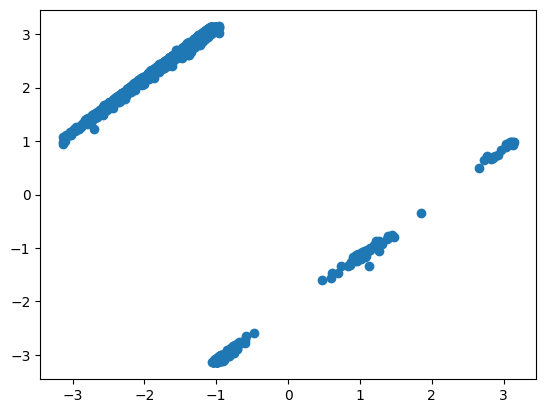

In [24]:
plt.scatter(phis, angles)

plt.show()

In [ ]:
def ang_value(phi_value):
    # your code here

### Задание 4.2. Соберите и выведите на гистограмме значения планарного угла $\angle(N^{i}, C_\alpha^{i}, C_\beta^{i})$. Нужно ли здесь искать зависимость с другими углами или можно просто выбрать какое-то одно значение?

In [ ]:
# your code here

### Задание 4.3. Проведите аналогичное исследование для длины связи $C_\alpha-C_\beta$.

In [ ]:
# your code here

### Задание 5. Теперь у нас все готово для восстановления атомов $C_\beta$. Загрузите <a href=https://disk.yandex.ru/d/QFymCllkjVpKTg>отсюда</a> подготовленный файл; поместите его в папку с ноутбуком и импортируйте все функции из него:

In [1]:
from geometry import *

Используйте функцию place_next_dihedral_atom, чтобы получить координаты следующего атома ($D$) в четверке двугранного угла $A,B,C,D$. Интерфейс запуска:
place_next_dihedral_atom(previous_3_atoms, dihedral_angle_val, planar_angle_val, distance), где:

- previous_3_atoms - np.array размера 3x3, где на каждой строчке записаны координаты соответствующего атома ($A,B,C$);
- dihedral_angle_val - значение двугранного угла $\angle (A-B-C-D)$ (в радианах);
- planar_angle_val - значение планарного угла $\angle (B-C-D)$ (в радианах);
- distance - расстояние $C-D$ (в ангстремах).

Пример запуска:

In [6]:
prev_coords = np.array([[0,0,0],
                        [1,0,0],
                        [2,1,0]])
dih_ang_val = np.pi/2
planar_ang_val = np.pi * 3/4
dist = 3
next_at = place_next_dihedral_atom(prev_coords, dih_ang_val, planar_ang_val, dist)
print("Атом D:", next_at)

Атом D: [3.5        2.5        2.12132034]


**Проверка:**

In [8]:
final_dih_ang = pdb.calc_dihedral(pdb.Vector(prev_coords[0]),
                                  pdb.Vector(prev_coords[1]),
                                  pdb.Vector(prev_coords[2]),
                                  pdb.Vector(next_at)
                                 )
print("Получился двугранный угол: {}, а должен быть: {}".format(final_dih_ang, dih_ang_val))z

Получился двугранный угол: 1.5707963267948966, а должен быть: 1.5707963267948966


In [9]:
final_plan_ang = pdb.calc_angle(pdb.Vector(prev_coords[1]),
                                pdb.Vector(prev_coords[2]),
                                pdb.Vector(next_at)
                                 )
print("Получился планарный угол: {}, а должен быть: {}".format(final_plan_ang, planar_ang_val))

Получился планарный угол: 2.3561944901923453, а должен быть: 2.356194490192345


In [10]:
final_bond_len = np.linalg.norm(next_at - prev_coords[2])
print("Получилась длина связи: {}, а должна быть: {}".format(final_bond_len, dist))

Получилась длина связи: 3.0000000000000004, а должна быть: 3


### С помощью описанной функции предскажите координаты всех $C_\beta$ в тестовом белке с индексом 0. В отдельную переменную сохраните все настоящие координаты $C_\beta$ из белка.

**Напоминание:** У GLY нет $C_\beta$!

In [11]:
# your code here

### А теперь давайте посмотрим на точность такого восстановления геометрии. Пусть переменная с предсказанными координатами называется $cb\_pred$, с оригинальными - $cb\_orig$.

In [18]:
from Bio.PDB.QCPSuperimposer import QCPSuperimposer

In [ ]:
imposer = QCPSuperimposer()
imposer.set(cb_orig, cb_pred)
imposer.run()
rms = imposer.get_rms()
print("Точность восстановленных CB = {} ангстрем".format(rms))